In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
aluguel_carros = pd.read_csv("dados/alucar.csv")

In [3]:
aluguel_carros.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [4]:
print(f'Quantidade de linhas e colunas: {aluguel_carros.shape}')

Quantidade de linhas e colunas: (24, 2)


In [5]:
print(f'Quantidade de dados nulos: \n{aluguel_carros.isna().sum()}')

Quantidade de dados nulos: 
mes       0
vendas    0
dtype: int64


In [6]:
print(f'Tipo de dados: \n{aluguel_carros.dtypes}')

Tipo de dados: 
mes       object
vendas     int64
dtype: object


In [7]:
aluguel_carros.mes = pd.to_datetime(aluguel_carros.mes)
print(f'Tipo de dados: \n{aluguel_carros.dtypes}')

Tipo de dados: 
mes       datetime64[ns]
vendas             int64
dtype: object


In [8]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

In [9]:
def grafico_linha(data, x, y, title, xlabel, ylabel):
    ax = sns.lineplot(x=x, y=y, data=data)
    ax.figure.set_size_inches(12,6)
    ax.set_title(title, loc='left', fontsize=18)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax = ax

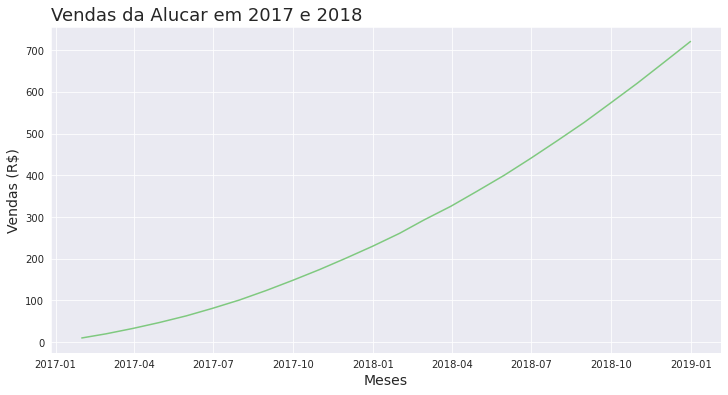

In [10]:
grafico_linha(aluguel_carros, "mes", "vendas", "Vendas da Alucar em 2017 e 2018", "Meses", "Vendas (R$)")

In [11]:
aluguel_carros['aumento'] = aluguel_carros['vendas'].diff()
aluguel_carros.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


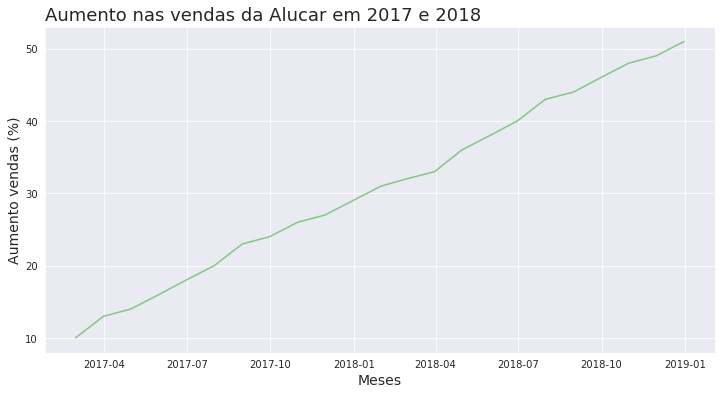

In [12]:
grafico_linha(aluguel_carros, "mes", "aumento", 
              "Aumento nas vendas da Alucar em 2017 e 2018", 
              "Meses", "Aumento vendas (%)")

In [13]:
aluguel_carros['aceleracao'] = aluguel_carros['aumento'].diff()
aluguel_carros.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


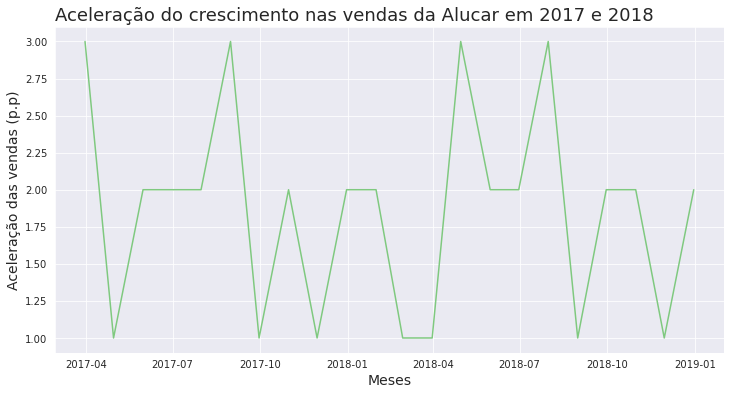

In [14]:
grafico_linha(aluguel_carros, "mes", "aceleracao", 
              "Aceleração do crescimento nas vendas da Alucar em 2017 e 2018", 
              "Meses", "Aceleração das vendas (p.p)")

In [15]:
def plot_comparacao(x, y1, y2, y3, dataset, title):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(title,fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax=ax

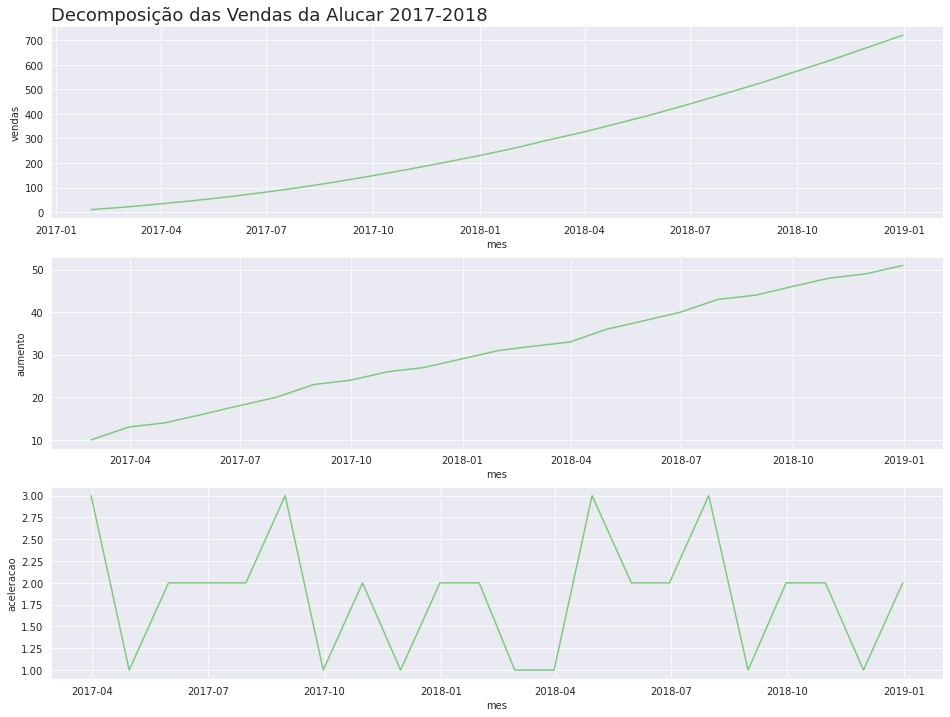

In [16]:
plot_comparacao("mes", "vendas", "aumento", "aceleracao", aluguel_carros, 
               "Decomposição das Vendas da Alucar 2017-2018")

### Autocorrelação

<p> A autocorrelação é a correlação de uma variável com ela mesma; serve para analisar se o comportamento da série de dados é homogêneo ao longo de toda a observação. </p>

In [17]:
from pandas.plotting import autocorrelation_plot

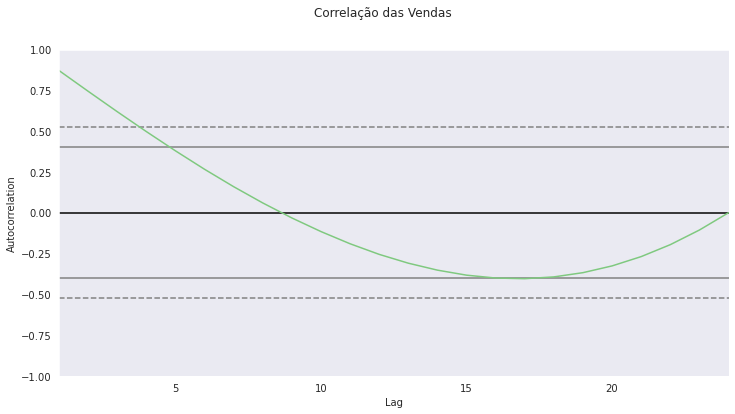

In [18]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas') 
autocorrelation_plot(aluguel_carros['vendas'])
ax=ax

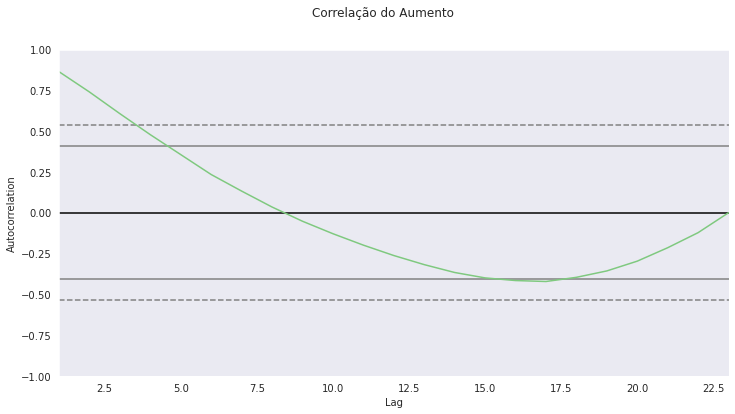

In [19]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Aumento')
autocorrelation_plot(aluguel_carros['aumento'][1:])
ax=ax

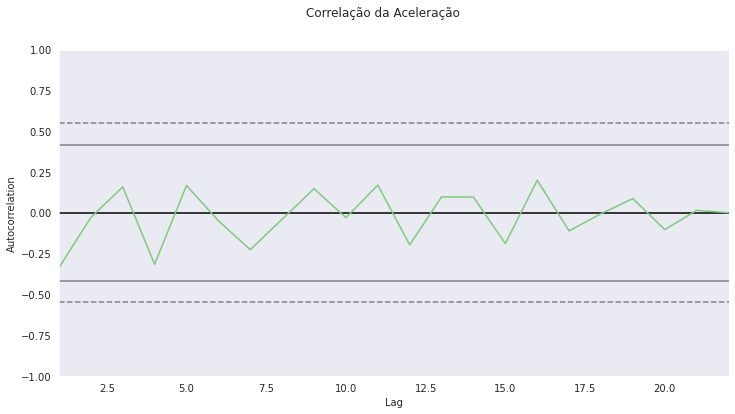

In [20]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da Aceleração')
autocorrelation_plot(aluguel_carros['aceleracao'][2:])
ax=ax

## Analisando os assinantes

In [21]:
assinantes = pd.read_csv('dados/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [22]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [23]:
print('Quantidade de linhas e colunas', assinantes.shape)
print('Quantidade de dados nulos', assinantes.isna().sum().sum())

Quantidade de linhas e colunas (24, 2)
Quantidade de dados nulos 0


In [24]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [25]:
assinantes['aumento']= assinantes ['assinantes'].diff()
assinantes['aceleracao']= assinantes ['aumento'].diff()

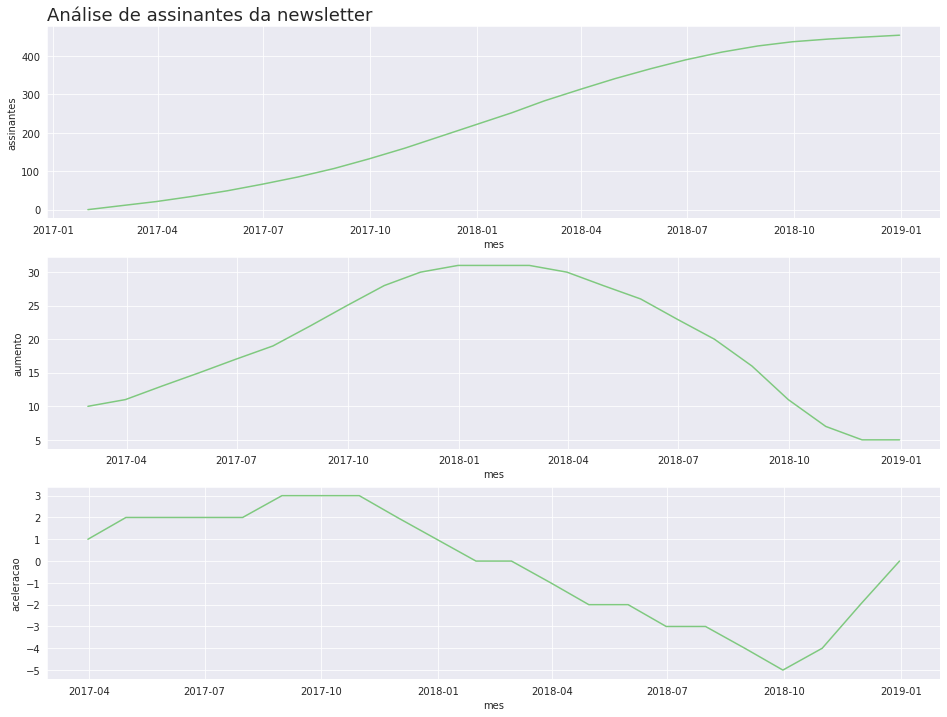

In [26]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', 
                assinantes, 'Análise de assinantes da newsletter')

<p> Fazendo a decomposição, vemos que de fato houve um crescimento, mas depois o aumento do número de assinantes cai de forma notória. Também ocorre desaceleração dos assinantes da newsletter num determinado momento, havendo aceleração negativa, ainda que ela tenha se iniciado positiva.</p>